In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm

Usaremos scipy.special, pois a versão anterior foi removida do scipy

In [ ]:
import scipy.special

# Use the factorial function from scipy.special
result = scipy.special.factorial(5)
print(result)  # Output: 120

120.0


In [ ]:
dados = pd.read_csv('dados.csv')

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# Regressão Linear

Com a regressão, nosso objetivo é estudar a relação entre as variáveis envolvidas, estimar parâmetros e obter previsões.

Vamos criar um Dataset

Este código utiliza a função numpy.random.uniform para gerar números uniformemente distribuídos entre os valores mínimos e máximos especificados.

Em seguida, verifica se a média dos números gerados está próxima da média desejada, repetindo a geração se necessário. Por fim, os arrays são convertidos para listas e armazenados em um dicionário.

Note que este método pode precisar de várias iterações para alcançar a média desejada, dependendo da distribuição dos números gerados.


In [ ]:
import numpy as np

# Definindo os parâmetros para X
min_x = 1069
max_x = 9997
mean_x = 6065
n = 50

# Gerando o conjunto X
X = np.random.uniform(min_x, max_x, n)  ## numpy.random é um submódulo da biblioteca numpy que contém funções para gerar números aleatórios.
while abs(np.mean(X) - mean_x) > 0.1: ## Tira o valor absoluto da diferença calculada no passo anterior. O valor absoluto é usado para garantir que a diferença seja tratada como um número positivo, independentemente de np.mean(X) ser maior ou menor que mean_x.
    X = np.random.uniform(min_x, max_x, n)

# Definindo os parâmetros para Y
min_y = 353
max_y = 3302
mean_y = 2011

# Gerando o conjunto Y como uma função de X
slope = (max_y - min_y) / (max_x - min_x)
intercept = mean_y - slope * mean_x
noise = np.random.normal(0, (max_y - min_y) * 0.05, n)  # Adicionando um pouco de ruído
Y = slope * X + intercept + noise

# Ajustando Y para garantir que está dentro dos limites especificados
while abs(np.mean(Y) - mean_y) > 0.1 or np.min(Y) < min_y or np.max(Y) > max_y:
    noise = np.random.normal(0, (max_y - min_y) * 0.05, n)  # Gerando novo ruído
    Y = slope * X + intercept + noise

# Convertendo os arrays para listas e criando o dicionário
dataset = {'X': X.tolist(), 'Y': Y.tolist()}  ## tolist() é um método de arrays numpy que converte o array numpy em uma lista Python.

# Exibindo o dataset
print(dataset)


{'X': [2237.933850618958, 4503.040270226752, 1366.7978484208588, 6170.751066418921, 7816.586770848673, 4481.848254665466, 9958.392724464426, 5238.979799795363, 7701.896956569156, 3905.5841921025126, 9226.880310842127, 7851.09862901152, 8405.859324161309, 5888.3777150269825, 9746.067442246072, 2564.011488550661, 4354.120811696705, 4126.500525794401, 6170.823849292917, 4700.417292638745, 8410.45185337374, 8903.776425035769, 1439.5567012180954, 5843.578045186458, 8614.741204520069, 5959.335615842002, 9090.20079107647, 7995.730301849796, 9494.022316235847, 1501.1709095438073, 8905.499579692774, 3991.4267327745547, 6062.745496307825, 3603.134700966927, 6583.832976277022, 3674.700943171775, 3159.053591393777, 7824.745102081208, 3938.1060001084384, 6131.113872701427, 8786.77659843834, 9665.969191549422, 2561.6072727370865, 5115.125568047316, 8333.514549007194, 5158.909891210722, 6771.493602458583, 5015.549280417023, 6458.37699445463, 7842.543388609105], 'Y': [686.1673238196814, 1357.760670911

## Algumas explicações extras:

A inclinação (slope) de uma linha reta determina o quão inclinada ela é. Nesta fórmula:

max_y e min_y são os valores máximo e mínimo desejados para Y.

max_x e min_x são os valores máximo e mínimo de X.

A inclinação é calculada como a diferença entre os valores máximos e mínimos de Y dividida pela diferença entre os valores máximos e mínimos de X. Isso cria uma relação linear entre X e Y que mantém a proporção entre seus respectivos intervalos.

Transformando em um DataFrame

In [ ]:
dataset = pd.DataFrame(dataset)

In [ ]:
dataset.head()

,X,Y
0,2237.933851,686.167324
1,4503.040270,1357.760671
2,1366.797848,546.064904
3,6170.751066,1809.756946
4,7816.586771,2685.831248


In [ ]:
dataset.shape

(50, 2)

## Estatísticas Descritivas

In [ ]:
dataset.describe()

,X,Y
count,50.000000,50.000000
mean,6065.055172,2010.976822
std,2444.853879,789.525627
min,1366.797848,485.722435
25%,4183.405597,1376.795099
50%,6096.929685,1976.678848
75%,8249.068487,2728.745238
max,9958.392724,3241.660171


Criando um boxplot

<Axes: title={'center': 'Boxplot'}, xlabel='Valores'>

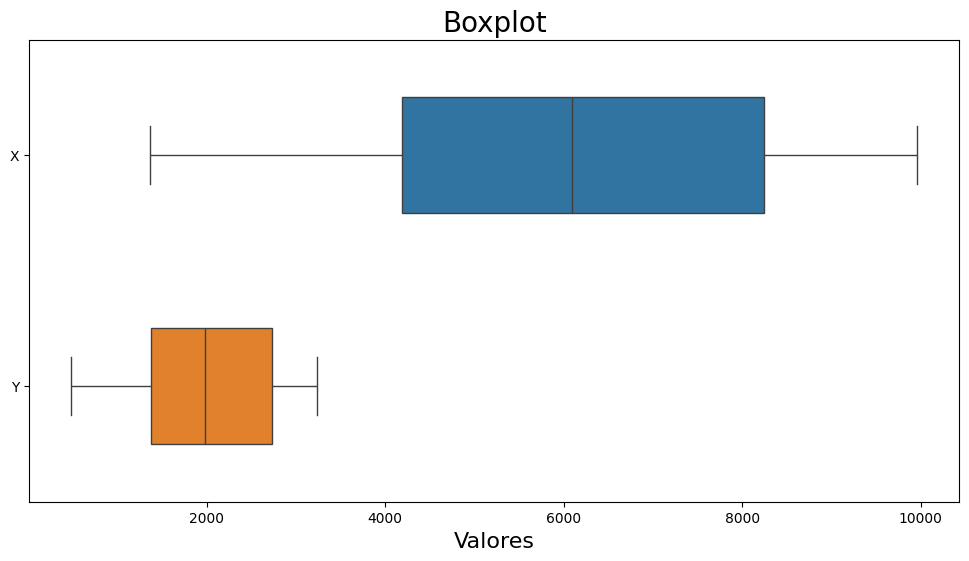

In [ ]:
ax = sns.boxplot(data=dataset, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Boxplot', fontsize=20)
ax.set_xlabel('Valores', fontsize = 16)
ax

Criando um gráfico de Regressão Linear

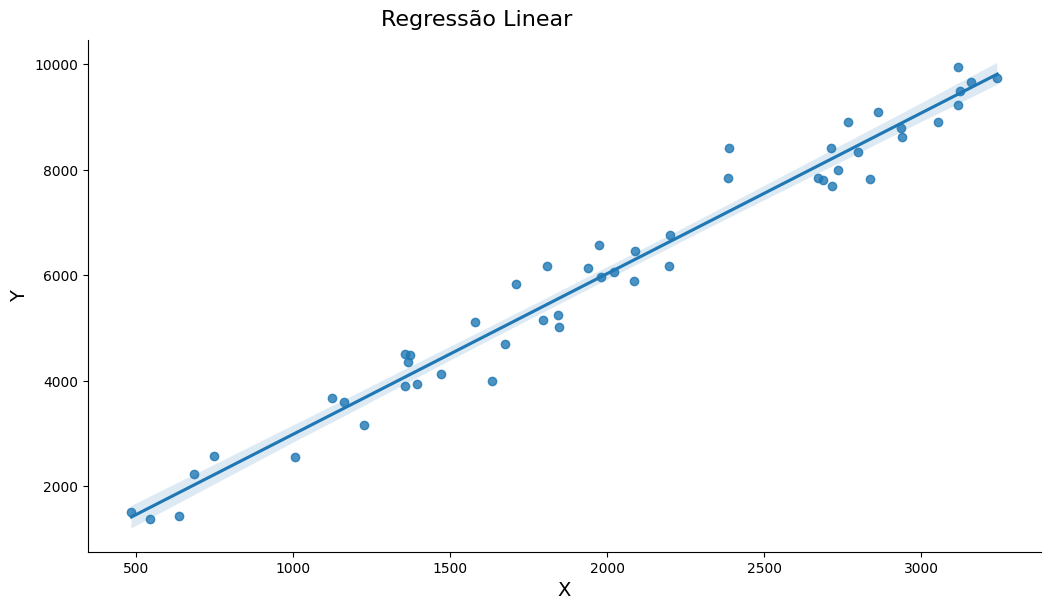

In [ ]:
ax = sns.lmplot(x='Y', y='X', data=dataset)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Regressão Linear', fontsize=16, y = 1.02)
ax.set_xlabels('X', fontsize=14)
ax.set_ylabels('Y', fontsize=14)
ax

# Análise de Correlação

A análise da matriz de correlação nos permite identificar a presença de relações lineares entre variáveis, sua intensidade e direção.

In [ ]:
## verificando a força de correalçao entre as variáveis
dataset.corr()

,X,Y
X,1.000000,0.984592
Y,0.984592,1.000000


In [ ]:
Y = dataset.Y
X = sm.add_constant(dataset.X)

In [ ]:
Y.head()

0     686.167324
1    1357.760671
2     546.064904
3    1809.756946
4    2685.831248
Name: Y, dtype: float64

In [ ]:
X.head()

,const,X
0,1.0,2237.933851
1,1.0,4503.040270
2,1.0,1366.797848
3,1.0,6170.751066
4,1.0,7816.586771


## Estimando o modelo

In [ ]:
resultado_regressao = sm.OLS(Y, X).fit()

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1522.
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           5.19e-38
Time:                        16:46:12   Log-Likelihood:                -316.83
No. Observations:                  50   AIC:                             637.7
Df Residuals:                      48   BIC:                             641.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.5440     53.225      1.551      0.1

In [ ]:
dataset['Y_predito'] = resultado_regressao.predict()

In [ ]:
dataset

,X,Y,Y_predito
0,2237.933851,686.167324,794.113000
1,4503.040270,1357.760671,1514.321695
2,1366.797848,546.064904,517.128343
3,6170.751066,1809.756946,2044.583676
4,7816.586771,2685.831248,2567.890297
5,4481.848255,1370.934903,1507.583525
6,9958.392724,3116.621860,3248.894624
7,5238.979800,1844.398584,1748.319553
8,7701.896957,2715.747479,2531.423754
9,3905.584192,1355.815221,1324.355759


# Covariância

Covariância, ou variância conjunta, é uma medida estatística que indica o grau em que duas variáveis aleatórias variam juntas. Se a covariância for positiva, significa que as duas variáveis tendem a aumentar ou diminuir simultaneamente. Se for negativa, significa que quando uma variável aumenta, a outra tende a diminuir, e vice-versa.



Exemplos:
Covariância Positiva: Se a altura e o peso das pessoas tendem a aumentar juntos, a covariância entre altura e peso será positiva.

Covariância Negativa: Se o número de horas assistindo TV e as notas escolares tendem a variar inversamente, a covariância entre elas será negativa.

A covariância é útil para entender a relação linear entre duas variáveis, mas por si só, ela não fornece a força da relação, apenas a direção. Para medir a força, utiliza-se o coeficiente de correlação, que é a covariância normalizada pelas variâncias das variáveis.

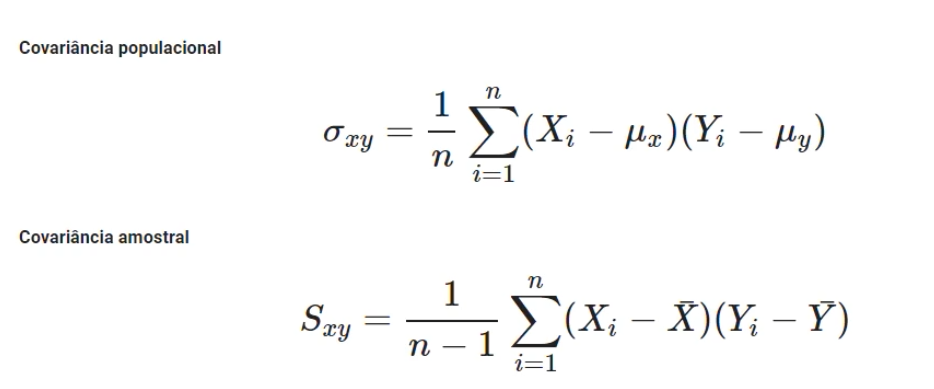

In [ ]:
## gerando amostra

amostra = dados.query('Renda < 5000').sample(n = 20, random_state = 101)

In [ ]:
amostra.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
5051,14,0,39,8,6,1500,1.616243
72082,52,0,29,8,7,1000,1.752518
5521,15,1,21,8,12,3500,1.694016
13849,22,0,49,2,13,1570,1.804156
14285,22,0,29,8,9,600,1.785481


Podemos obter uma matriz de covariância a partir de uma DataFrame pandas, utilizando o método .cov()

Covariância indica que existe uma relação linear entre as variáveis. **Não é uma medida de causalidade**

Usamos covariância para entender se x e y aumentam ou diminuiem em conjunto. Se há uma relação (sem determinar a força) entre as variáveis.

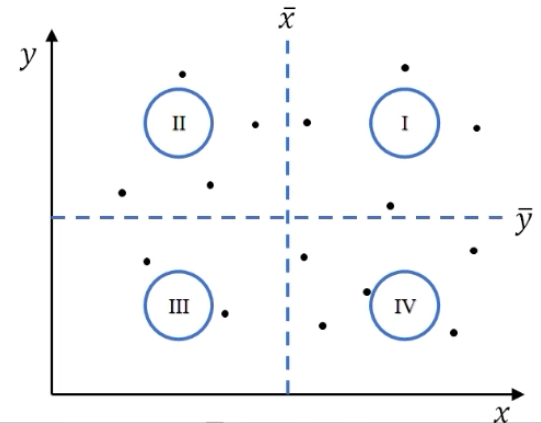

Se os valores se encontram entre os campos I e III há chances de existir uma covariância. Pois X e Y estão aumentando ou diminuindo em sincronia

Se os valores estiverem entre os campos II e IV entende-se que não existe uma covariância. Pois enquanto um aumento o outro diminui.

In [ ]:
## obtendo matriz de covariancia com .cov()

amostra[['Idade', 'Renda', 'Anos de Estudo', 'Altura']].cov()

,Idade,Renda,Anos de Estudo,Altura
Idade,134.410526,-4947.968421,-16.410526,0.016506
Renda,-4947.968421,764668.326316,2209.021053,-7.138236
Anos de Estudo,-16.410526,2209.021053,16.936842,0.111281
Altura,0.016506,-7.138236,0.111281,0.003354


In [ ]:
##

amostra.Idade.var()

134.4105263157895

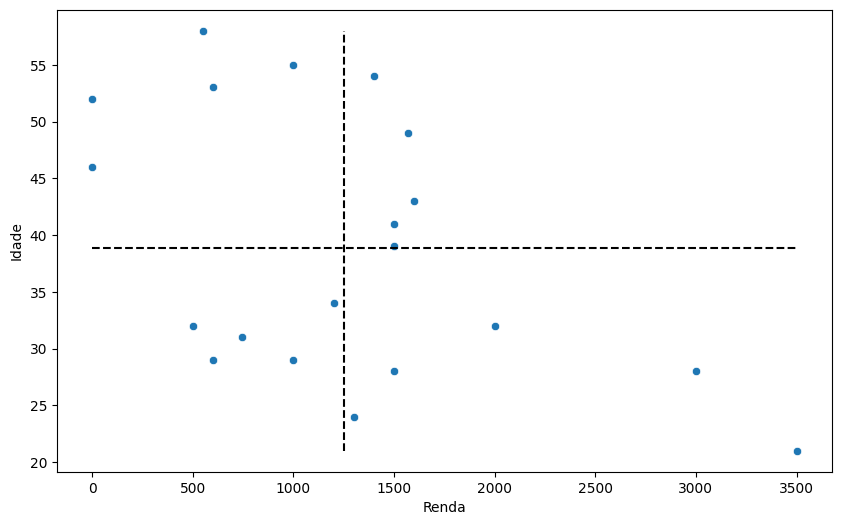

In [ ]:
## criando um grafico para ver visualmente a covariância entre renda e idade

x = amostra.Renda
y = amostra.Idade

ax = sns.scatterplot(x='Renda', y='Idade', data=amostra)
ax.figure.set_size_inches(10, 6)
ax.hlines(y=y.mean(), xmin=x.min(), xmax=x.max(), colors='black', linestyles='dashed')  ## note que estamos colocando a linha horizontal no valor médio de y, porém com as máximas de x
ax.vlines(x=x.mean(), ymin=y.min(), ymax=y.max(), colors='black', linestyles='dashed')  ## e aqui colocamos a linha vertical no valor medio de x, com as máximas de y

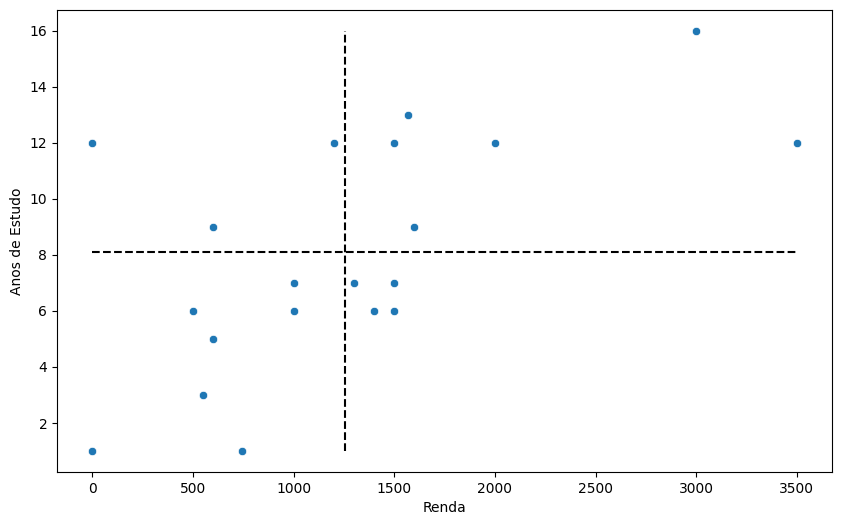

In [ ]:
## criando um grafico para ver visualmente a covariância entre renda e anos de estudo

x = amostra.Renda
y = amostra['Anos de Estudo']

ax = sns.scatterplot(x='Renda', y='Anos de Estudo', data=amostra)
ax.figure.set_size_inches(10, 6)
ax.hlines(y=y.mean(), xmin=x.min(), xmax=x.max(), colors='black', linestyles='dashed')
ax.vlines(x=x.mean(), ymin=y.min(), ymax=y.max(), colors='black', linestyles='dashed')

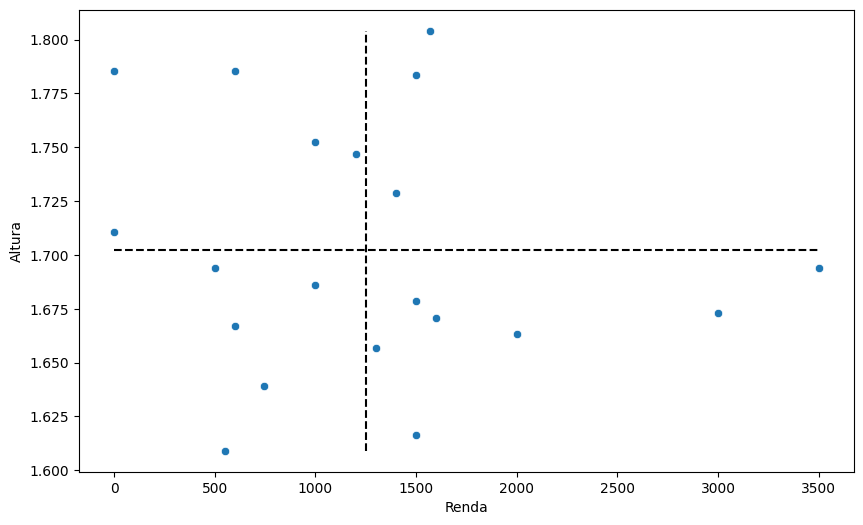

In [ ]:
## criando um grafico para ver visualmente a covariância entre renda e anos de estudo
## aqui vemos que entre todos, a covariância entre renda e altura são negativos

x = amostra.Renda
y = amostra.Altura

ax = sns.scatterplot(x='Renda', y='Altura', data=amostra)
ax.figure.set_size_inches(10, 6)
ax.hlines(y=y.mean(), xmin=x.min(), xmax=x.max(), colors='black', linestyles='dashed')
ax.vlines(x=x.mean(), ymin=y.min(), ymax=y.max(), colors='black', linestyles='dashed')

Valores altos de covariância não indicam força. Pois cada dado está em um sistema númeral, unitário diferente.

Somente com o teste de correlação, onde os valores são normalizados que conseguimos medir a força das relações.

# Coeficiente de correlação de Pearson

A correlação de Pearson, também conhecida como coeficiente de correlação de Pearson, é uma medida estatística que quantifica a força e a direção da relação linear entre duas variáveis contínuas. O coeficiente de correlação de Pearson é denotado por



r = 1: Indica uma correlação linear perfeita positiva. À medida que uma variável aumenta, a outra também aumenta proporcionalmente.

r= −1: Indica uma correlação linear perfeita negativa. À medida que uma variável aumenta, a outra diminui proporcionalmente.

r = 0: Indica que não há correlação linear entre as variáveis.


**Interpretação**
Correlação Positiva: Se


r estiver próximo de 1, indica uma forte relação linear positiva.
Correlação Negativa: Se


r estiver próximo de -1, indica uma forte relação linear negativa.
Nenhuma Correlação: Se


r estiver próximo de 0, indica pouca ou nenhuma relação linear.
A correlação de Pearson é amplamente utilizada em estatística e análise de dados para determinar a relação entre duas var

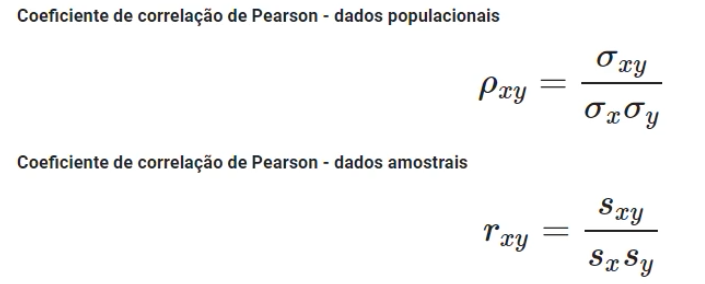

Fazendo o cálculo manualmente

In [ ]:
s_xy = dados[['Altura', 'Renda']].cov()
s_xy

,Altura,Renda
Altura,0.006355,-1.078964e+00
Renda,-1.078964,1.104491e+07


In [ ]:
s_xy = s_xy.Altura.loc['Renda']

In [ ]:
s_x = dados.Altura.std()
s_y = dados.Renda.std()

In [ ]:
r_xy = s_xy / (s_x * s_y)
r_xy

-0.0040726081434002874

## Fazendo o cálculo com pandas

Usamos .corr()

In [ ]:
## correlação fraca

dados[['Altura', 'Renda']].corr()


,Altura,Renda
Altura,1.000000,-0.004073
Renda,-0.004073,1.000000


In [ ]:
## correlação forte

dataset[['Y', 'X']].corr()

,Y,X
Y,1.000000,0.984592
X,0.984592,1.000000


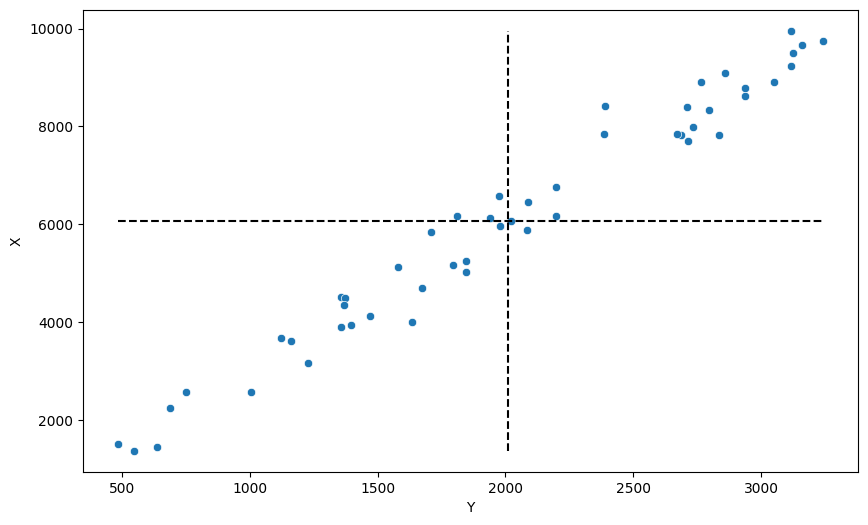

In [ ]:
## vamos confirmar a força da correlação

x = dataset.Y
y = dataset.X

ax = sns.scatterplot(x='Y', y='X', data=dataset)
ax.figure.set_size_inches(10, 6)
ax.hlines(y=y.mean(), xmin=x.min(), xmax=x.max(), colors='black', linestyles='dashed')
ax.vlines(x=x.mean(), ymin=y.min(), ymax=y.max(), colors='black', linestyles='dashed')

# Regressão Linear Simples


Vamos reaproveitar o dataser criado anteriormente

In [ ]:
import numpy as np

# Definindo os parâmetros para X
min_x = 1069
max_x = 9997
mean_x = 6065
n = 50

# Gerando o conjunto X
X = np.random.uniform(min_x, max_x, n)  ## numpy.random é um submódulo da biblioteca numpy que contém funções para gerar números aleatórios.
while abs(np.mean(X) - mean_x) > 0.1: ## Tira o valor absoluto da diferença calculada no passo anterior. O valor absoluto é usado para garantir que a diferença seja tratada como um número positivo, independentemente de np.mean(X) ser maior ou menor que mean_x.
    X = np.random.uniform(min_x, max_x, n)

# Definindo os parâmetros para Y
min_y = 353
max_y = 3302
mean_y = 2011

# Gerando o conjunto Y como uma função de X
slope = (max_y - min_y) / (max_x - min_x)
intercept = mean_y - slope * mean_x
noise = np.random.normal(0, (max_y - min_y) * 0.05, n)  # Adicionando um pouco de ruído
Y = slope * X + intercept + noise

# Ajustando Y para garantir que está dentro dos limites especificados
while abs(np.mean(Y) - mean_y) > 0.1 or np.min(Y) < min_y or np.max(Y) > max_y:
    noise = np.random.normal(0, (max_y - min_y) * 0.05, n)  # Gerando novo ruído
    Y = slope * X + intercept + noise

# Convertendo os arrays para listas e criando o dicionário
dataset = {'X': X.tolist(), 'Y': Y.tolist()}  ## tolist() é um método de arrays numpy que converte o array numpy em uma lista Python.

# Exibindo o dataset
print(dataset)

{'X': [9677.980497908113, 9264.795121960873, 1497.9590266003408, 8780.455593798208, 7849.403544972935, 2444.470164651087, 9061.209903935362, 6246.384087870488, 9122.550282377135, 7645.05301640032, 4491.245905279127, 9421.453853645427, 4275.080282169905, 3150.5853367116993, 3436.4129930552763, 2340.5808316317343, 8175.782273973084, 6982.895120394201, 3286.969715058419, 5142.936294166157, 6338.607251309455, 6315.989913517682, 3416.8701600546615, 8552.783961714147, 8933.36578377492, 6601.773115057367, 4935.943649986939, 7887.181370390396, 3534.82102879477, 2923.79888603937, 8505.48392753736, 8633.827450491464, 9806.045010424996, 1288.8531840367252, 9383.883676363635, 8695.664564943721, 7088.527973195287, 9278.921110413712, 9290.175980088576, 6601.212666205971, 5115.480283787962, 8046.689617234989, 2919.244823050288, 8664.44205524663, 7809.704871902426, 1490.3741081616693, 2087.6154358928407, 2595.1359449013416, 2990.565606653059, 1221.6411508468964], 'Y': [3164.7128678946647, 3137.2311592

In [ ]:
dataset = pd.DataFrame(dataset)

In [ ]:
dataset.head()

,X,Y
0,9677.980498,3164.712868
1,9264.795122,3137.231159
2,1497.959027,576.092157
3,8780.455594,3058.432143
4,7849.403545,2576.751705


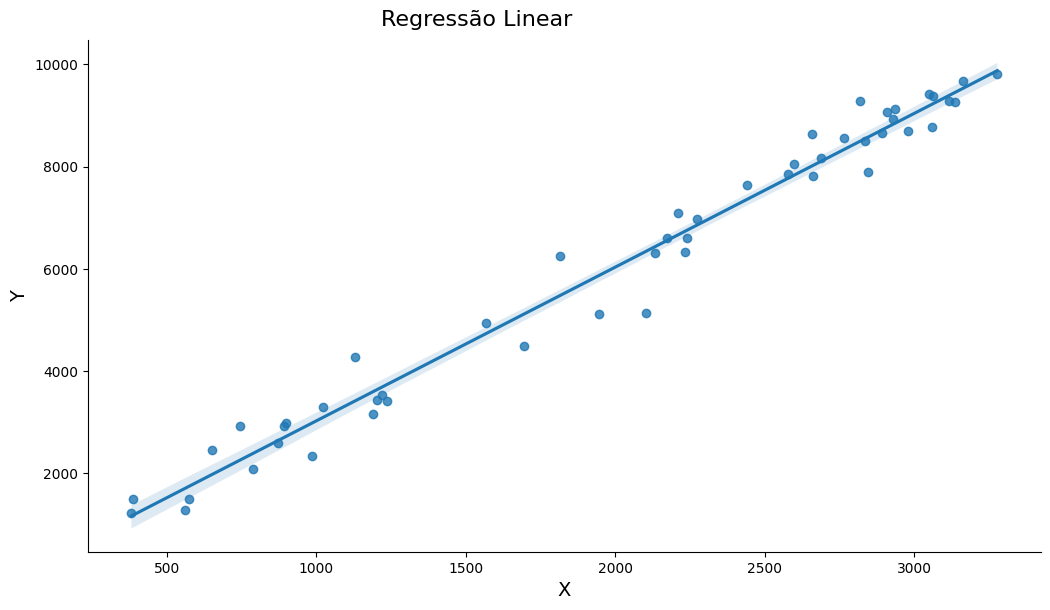

In [ ]:
ax = sns.lmplot(x='Y', y='X', data=dataset)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Regressão Linear', fontsize=16, y = 1.02)
ax.set_xlabels('X', fontsize=14)
ax.set_ylabels('Y', fontsize=14)
ax

In [ ]:
dataset.corr()

,X,Y
X,1.000000,0.988983
Y,0.988983,1.000000


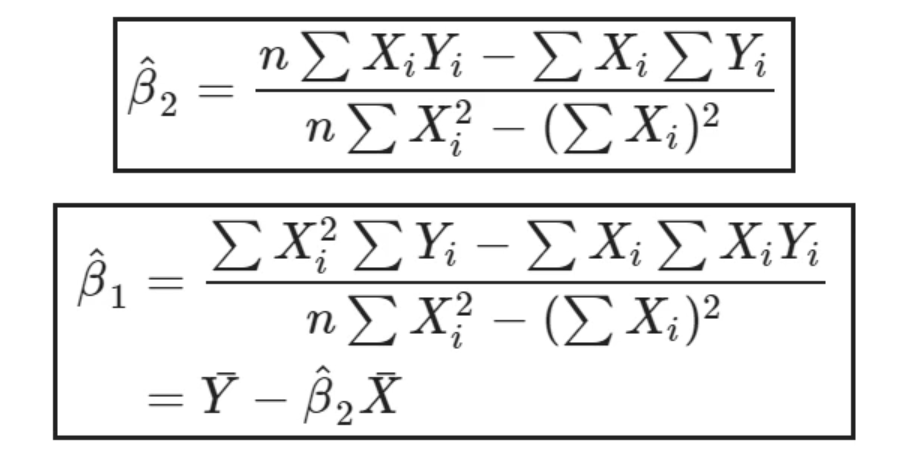

### Vamos obter o parametro beta 2

In [ ]:
n = len(dataset)
n

50

In [ ]:
SOMA_Y = dataset.Y.sum()
SOMA_Y

100550.50339653646

In [ ]:
SOMA_X = dataset.X.sum()
SOMA_X

303248.8284085791

In [ ]:
dataset['X2'] = dataset.X ** 2
dataset.head()

,X,Y,X2
0,9677.980498,3164.712868,9.366331e+07
1,9264.795122,3137.231159,8.583643e+07
2,1497.959027,576.092157,2.243881e+06
3,8780.455594,3058.432143,7.709640e+07
4,7849.403545,2576.751705,6.161314e+07


In [ ]:
SOMA_X2 = dataset.X2.sum()
SOMA_X2

2226260267.8852625

In [ ]:
SOMA_Y2 = dataset.Y.apply(lambda y: y ** 2).sum()
SOMA_Y2

244035728.366635

In [ ]:
dataset['XY'] = dataset.X * dataset.Y
dataset.head()

,X,Y,X2,XY
0,9677.980498,3164.712868,9.366331e+07,3.062803e+07
1,9264.795122,3137.231159,8.583643e+07,2.906580e+07
2,1497.959027,576.092157,2.243881e+06,8.629624e+05
3,8780.455594,3058.432143,7.709640e+07,2.685443e+07
4,7849.403545,2576.751705,6.161314e+07,2.022596e+07


In [ ]:
SOMA_XY = dataset.XY.sum()
SOMA_XY

735674337.0849907

In [ ]:
dataset.drop(['X2', 'XY'], axis = 1, inplace = True)

In [ ]:
dataset.head()

,X,Y
0,9677.980498,3164.712868
1,9264.795122,3137.231159
2,1497.959027,576.092157
3,8780.455594,3058.432143
4,7849.403545,2576.751705


Realizando o cálculo:

In [ ]:
numerador = n * SOMA_XY - SOMA_X * SOMA_Y
denominador = n * SOMA_X2 - SOMA_X ** 2
beta_2 = numerador / denominador
beta_2

0.32510938925186333

### Agora vamos obter o parametro beta 1

In [ ]:
beta_1 = dataset.Y.mean() - beta_2 * dataset.X.mean()
beta_1

39.22924002560376

### Usando Statsmodels

In [ ]:
import statsmodels.api as sm

In [ ]:
Y = dataset.Y
X = sm.add_constant(dataset.X)

In [ ]:
Y.head()

0    3164.712868
1    3137.231159
2     576.092157
3    3058.432143
4    2576.751705
Name: Y, dtype: float64

In [ ]:
X.head()

,const,X
0,1.0,9677.980498
1,1.0,9264.795122
2,1.0,1497.959027
3,1.0,8780.455594
4,1.0,7849.403545


In [ ]:
resultado_regressao = sm.OLS(Y, X, missing = 'drop').fit()

In [ ]:
beta_1

39.22924002560376

In [ ]:
beta_2

0.32510938925186333

In [ ]:
resultado_regressao.params ## .params para visualizar os parametros (beta1 e beta2)

const    39.229240
X         0.325109
dtype: float64

Intervalo de confiânça para os parâmetros estimados

In [ ]:
resultado_regressao.conf_int(alpha = 0.05)

,0,1
const,-55.004921,133.463401
X,0.310987,0.339232


### Exercício
Onde temos o número de domicílios que possuem computador (Y) e a renda total recebida por pessoas de 10 anos ou mais (X), em cada um dos estados brasileiros.

Acredita-se que a posse de computadores tenha uma relação linear com a renda das famílias e para comprovar isso, podemos estimar uma regressão linear com os dados acima e avaliar os resultados obtidos.

Neste problema, precisamos, inicialmente, obter as estimativas dos parâmetros de regressão.

Informações extras:

O valor da renda está dividido por 1.000.000, isto é, se um estado tem uma renda total de RS 4,2, significa que ele tem uma renda total de RS 4.200.000.

In [ ]:
dataset_2 = {
    'Y': [670, 220, 1202, 188, 1869, 248, 477, 1294, 816, 2671, 1403, 1586, 3468, 973, 701, 5310, 10950, 2008, 9574, 28863, 6466, 4274, 6432, 1326, 1423, 3211, 2140],
    'X': [1.59, 0.56, 2.68, 0.47, 5.2, 0.58, 1.32, 3.88, 2.11, 5.53, 2.6, 2.94, 6.62, 1.91, 1.48, 10.64, 22.39, 4.2, 21.9, 59.66, 14.22, 9.57, 14.67, 3.28, 3.49, 6.94, 6.25]
}

In [ ]:
Y_2 = dataset_2['Y']
X_2 = sm.add_constant(dataset_2['X'])

resultado_regressao_2 = sm.OLS(Y_2, X_2, missing = 'drop').fit()

In [ ]:
resultado_regressao_2.params

array([-168.3211559 ,  481.39039694])

### Obtendo previsões dentro da amostra

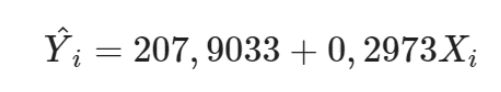

Vamos calcular

In [ ]:
dataset['Y_previsto'] = beta_1 + beta_2 * dataset.X
dataset.head(10)

,X,Y,Y_previsto
0,9677.980498,3164.712868,3185.631569
1,9264.795122,3137.231159,3051.301124
2,1497.959027,576.092157,526.229784
3,8780.455594,3058.432143,2893.837795
4,7849.403545,2576.751705,2591.144033
5,2444.470165,651.468992,833.949442
6,9061.209904,2908.224768,2985.113658
7,6246.384088,1816.866944,2069.987356
8,9122.550282,2936.205401,3005.055991
9,7645.053016,2442.581723,2524.707757


### Usando o Statsmodels

In [ ]:
dataset['Y_previsto_statsmodel'] = resultado_regressao.predict()
dataset.head(10)

,X,Y,Y_previsto,Y_previsto_statsmodel
0,9677.980498,3164.712868,3185.631569,3185.631569
1,9264.795122,3137.231159,3051.301124,3051.301124
2,1497.959027,576.092157,526.229784,526.229784
3,8780.455594,3058.432143,2893.837795,2893.837795
4,7849.403545,2576.751705,2591.144033,2591.144033
5,2444.470165,651.468992,833.949442,833.949442
6,9061.209904,2908.224768,2985.113658,2985.113658
7,6246.384088,1816.866944,2069.987356,2069.987356
8,9122.550282,2936.205401,3005.055991,3005.055991
9,7645.053016,2442.581723,2524.707757,2524.707757


In [ ]:
dataset.drop(['Y_previsto_statsmodel'], axis = 1, inplace = True)

In [ ]:
dataset.head(10)

,X,Y,Y_previsto
0,9677.980498,3164.712868,3185.631569
1,9264.795122,3137.231159,3051.301124
2,1497.959027,576.092157,526.229784
3,8780.455594,3058.432143,2893.837795
4,7849.403545,2576.751705,2591.144033
5,2444.470165,651.468992,833.949442
6,9061.209904,2908.224768,2985.113658
7,6246.384088,1816.866944,2069.987356
8,9122.550282,2936.205401,3005.055991
9,7645.053016,2442.581723,2524.707757


## Prevendo com valores fora da amostra

Usando somente os betas podemos prever ym usando x com um cálculo simples em uma função:

In [ ]:
def prever(x):
  return beta_1 + beta_2 * x


prever(7550)

2493.805128877172

Agora vamos prever y, usando determionado valor de x usando statsmodels:

In [ ]:
resultado_regressao.predict([1, 7550]) ## passamos a constante e depois o valor de x que queremos prever y

array([2493.80512888])

A constante que passamos para o predict do statsmodels é um valor que representa o intercepto da reta de regressão.

Para entender melhor, imagine que você está tentando prever o preço de um carro baseado na sua quilometragem. A reta de regressão seria uma linha que representa a relação entre a quilometragem e o preço. O intercepto dessa reta seria o preço do carro quando a quilometragem é zero.

### Exercício 2

Considerando os dados do problema anterior, onde se acredita que a posse de computadores tenha uma relação linear com a renda das famílias, após estimarmos o modelo (problema anterior), suponha que seja criado um estado e que este apresente uma renda total de R$ 2.345.678.

Informações extras:

O valor da renda está dividido por 1.000.000, isto é, se um estado tem uma renda total de RS 4,2, significa que ele tem uma renda total de RS 4.200.000.

Utilize o ferramental do statsmodels para solucionar o problema.

In [ ]:
dataset_3 = {
    'Y': [670, 220, 1202, 188, 1869, 248, 477, 1294, 816, 2671, 1403, 1586, 3468, 973, 701, 5310, 10950, 2008, 9574, 28863, 6466, 4274, 6432, 1326, 1423, 3211, 2140],
    'X': [1.59, 0.56, 2.68, 0.47, 5.2, 0.58, 1.32, 3.88, 2.11, 5.53, 2.6, 2.94, 6.62, 1.91, 1.48, 10.64, 22.39, 4.2, 21.9, 59.66, 14.22, 9.57, 14.67, 3.28, 3.49, 6.94, 6.25]
}

In [ ]:
Y_3 = dataset_3['Y']
X_3 = sm.add_constant(dataset_3['X'])

resultado_regressao_3 = sm.OLS(Y_3, X_3, missing = 'drop').fit()

resultado_regressao_3.predict([1, (2345.678 / 1000)])

array([960.86570761])

# Resíduos

Diferença do valor observado do valor estimado

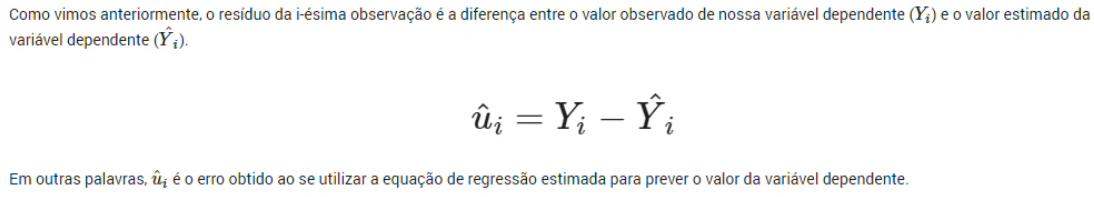

In [ ]:
## criando variável u como resíduo

dataset['u'] = dataset.Y - dataset.Y_previsto
dataset.head()

,X,Y,Y_previsto,u
0,9677.980498,3164.712868,3185.631569,-20.918701
1,9264.795122,3137.231159,3051.301124,85.930036
2,1497.959027,576.092157,526.229784,49.862373
3,8780.455594,3058.432143,2893.837795,164.594348
4,7849.403545,2576.751705,2591.144033,-14.392328


## Usando Statsmodels

In [ ]:
dataset['Residuos'] = resultado_regressao.resid
dataset.head()

,X,Y,Y_previsto,u,Residuos
0,9677.980498,3164.712868,3185.631569,-20.918701,-20.918701
1,9264.795122,3137.231159,3051.301124,85.930036,85.930036
2,1497.959027,576.092157,526.229784,49.862373,49.862373
3,8780.455594,3058.432143,2893.837795,164.594348,164.594348
4,7849.403545,2576.751705,2591.144033,-14.392328,-14.392328


In [ ]:
dataset.drop('u', axis=1, inplace=True)
dataset.head()

,X,Y,Y_previsto,Residuos
0,9677.980498,3164.712868,3185.631569,-20.918701
1,9264.795122,3137.231159,3051.301124,85.930036
2,1497.959027,576.092157,526.229784,49.862373
3,8780.455594,3058.432143,2893.837795,164.594348
4,7849.403545,2576.751705,2591.144033,-14.392328


a média de u (resíduo) normalmente é próximo de 0

In [ ]:
dataset.Residuos.mean() ## note os 14 zeros

6.389200279954821e-13

<Axes: title={'center': 'Resíduos vs Variável independente'}, xlabel='X', ylabel='Resíduos'>

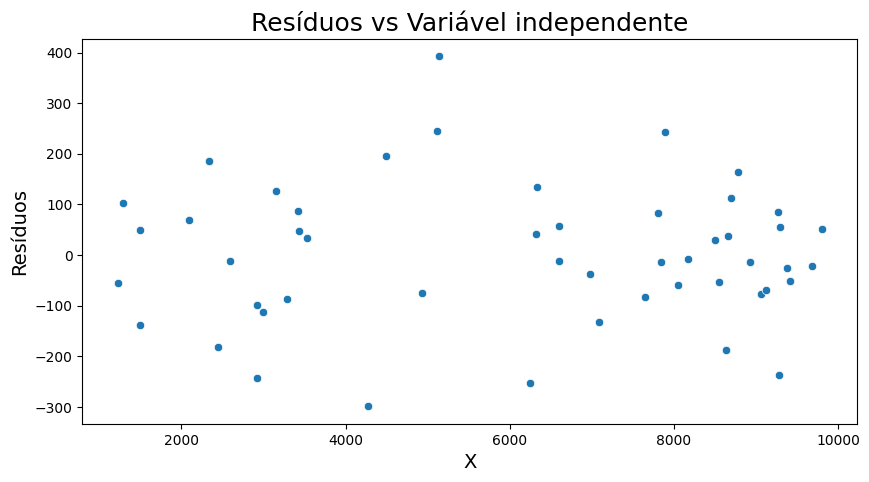

In [ ]:
## plotando os resíduos

ax = sns.scatterplot(x='X', y='Residuos', data=dataset)
ax.figure.set_size_inches(10, 5)
ax.set_title('Resíduos vs Variável independente', fontsize=18)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

Precisamos plotar o Y previsto contra o Resíduo para verificar a constância da variância

<Axes: title={'center': 'Resíduos vs Y Previsto'}, xlabel='Y Previsto', ylabel='Resíduos'>

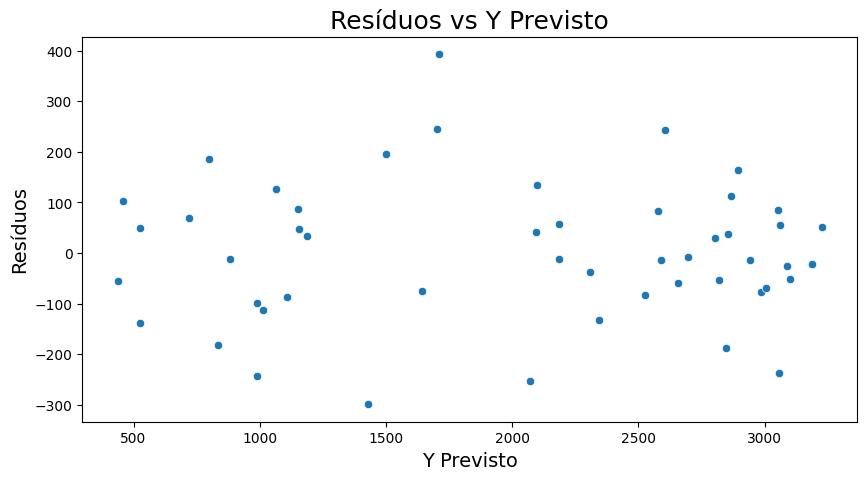

In [ ]:
ax = sns.scatterplot(x='Y_previsto', y='Residuos', data=dataset)
ax.figure.set_size_inches(10, 5)
ax.set_title('Resíduos vs Y Previsto', fontsize=18)
ax.set_xlabel('Y Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

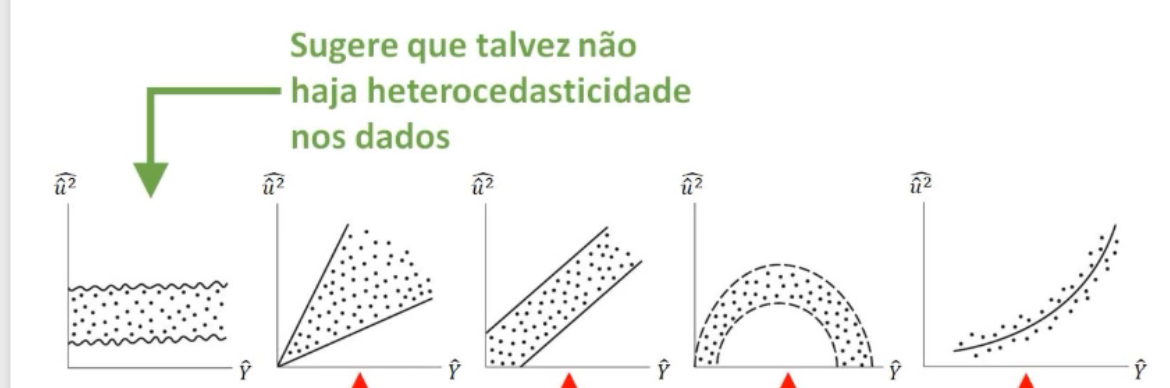

<Axes: title={'center': 'Resíduos ao quadrado vs Y Previsto'}, xlabel='Y Previsto', ylabel='Resíduos ao quadrado'>

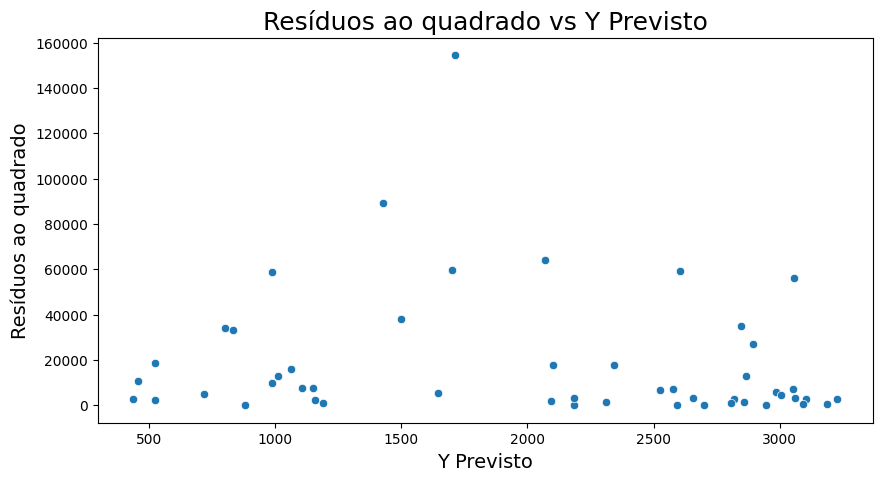

In [ ]:
ax = sns.scatterplot(x= dataset.Y_previsto, y= dataset.Residuos ** 2)
ax.figure.set_size_inches(10, 5)
ax.set_title('Resíduos ao quadrado vs Y Previsto', fontsize=18)
ax.set_xlabel('Y Previsto', fontsize=14)
ax.set_ylabel('Resíduos ao quadrado', fontsize=14)
ax

## Coeficiente de determinação R²

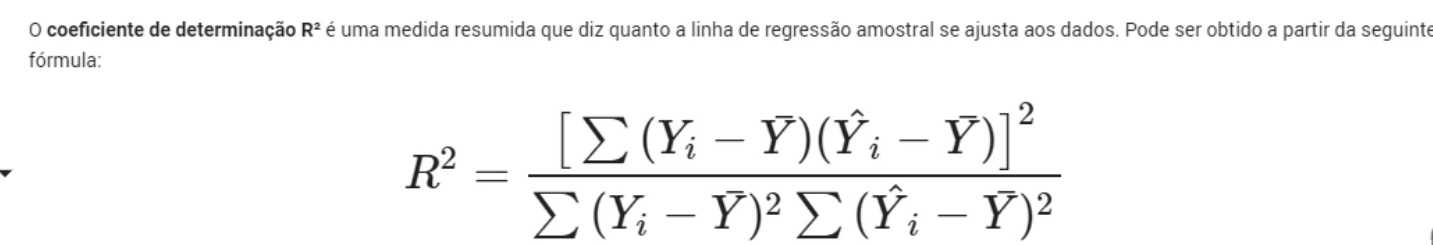

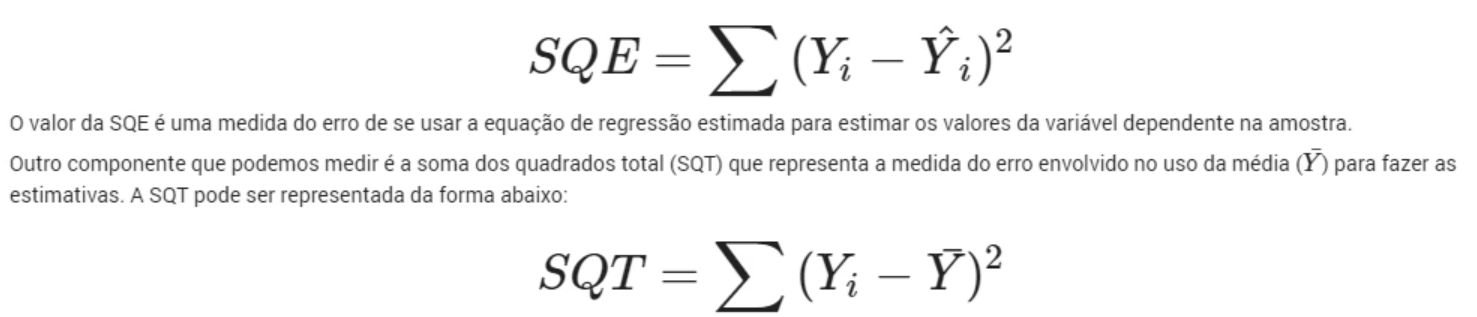

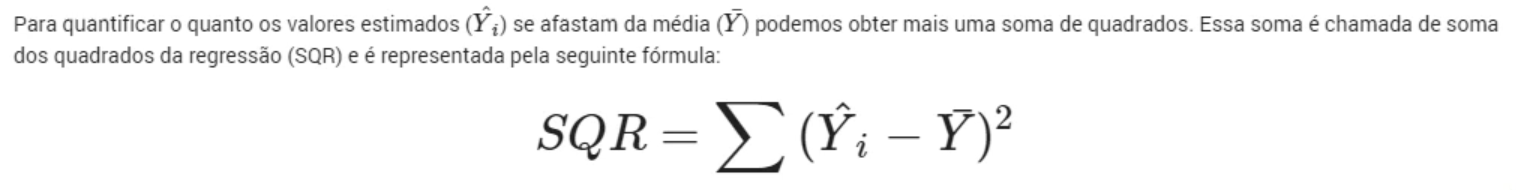

Caculando SQE

In [ ]:
dataset.head()

,X,Y,Y_previsto,Residuos
0,9677.980498,3164.712868,3185.631569,-20.918701
1,9264.795122,3137.231159,3051.301124,85.930036
2,1497.959027,576.092157,526.229784,49.862373
3,8780.455594,3058.432143,2893.837795,164.594348
4,7849.403545,2576.751705,2591.144033,-14.392328


In [ ]:
SQE = dataset.Residuos.apply(lambda u: u ** 2).sum()
SQE

916574.1162262082

### Usando Statsmodels

In [ ]:
resultado_regressao.ssr

916574.1162262082

Caculando SQT

In [ ]:
SQT = dataset.Y.apply(lambda y: (y - dataset.Y.mean()) ** 2).sum()
SQT

41827653.70069712

Caculando SQR

In [ ]:
SQR = dataset.Y_previsto.apply(lambda y: (y - dataset.Y.mean()) ** 2).sum()
SQR

40911079.58447097

### Usando Statsmodels para obter SQR

In [ ]:
resultado_regressao.ess

40911079.584470905

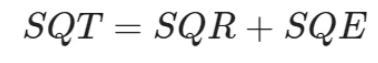

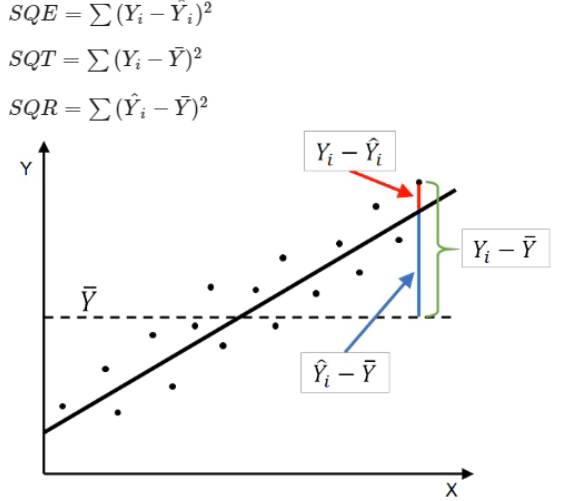

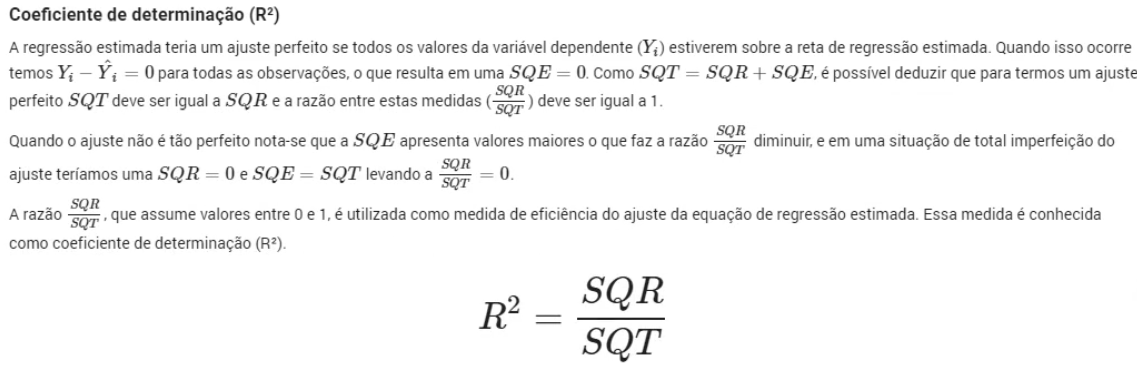

In [ ]:
R2 = SQR / SQT
R2

0.9780868866615182

### Usando Statsmodels para obter R²

In [ ]:
resultado_regressao.rsquared

0.9780868866615167

### Exercício 3

Considerando os dados do problema proposto em exercícios anteriores, onde se acredita que a posse de computadores tenha uma relação linear com a renda das famílias.

Informações extras:

O valor da renda está dividido por 1.000.000, isto é, se um estado tem uma renda total de R$ 4,2, significa que ele tem uma renda total de R$ 4.200.000.

Utilize o ferramental do statsmodels para solucionar o problema.

Y é o número de domicílios que possuem computador
X é a renda total recebida por pessoas de 10 anos ou mais, em cada um dos estados brasileiros

Qual o  valor do R² obtido de nossa regressão linear.

In [ ]:
resultado_regressao_2.rsquared

0.9967917066613234

# Erro quadrático médio

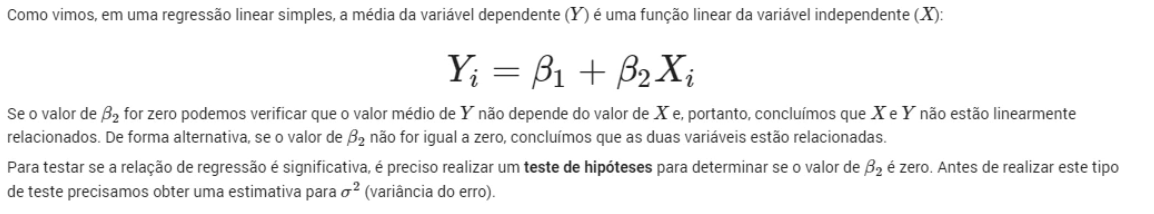

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2142.
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.74e-41
Time:                        16:58:36   Log-Likelihood:                -316.36
No. Observations:                  50   AIC:                             636.7
Df Residuals:                      48   BIC:                             640.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.2292     46.868      0.837      0.4

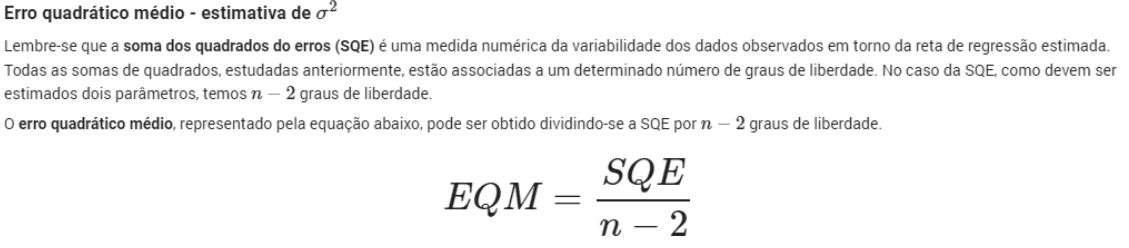

In [ ]:
SQE

916574.1162262082

In [ ]:
n

50

In [ ]:
EQM = SQE / (n - 2)
EQM

19095.294088046005

### Usando Statsmodels para calcular o erro quadrático médio

In [ ]:
EQM = resultado_regressao.mse_resid
EQM

19095.294088046005

#Teste de significância dos parâmetros


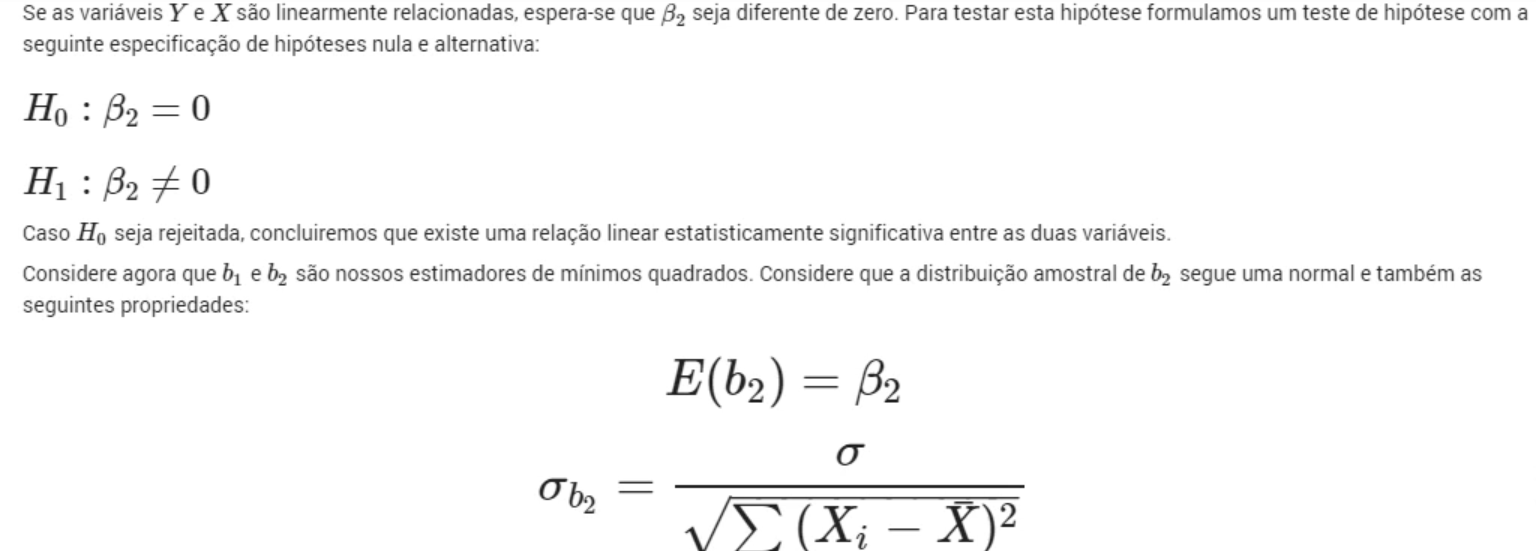

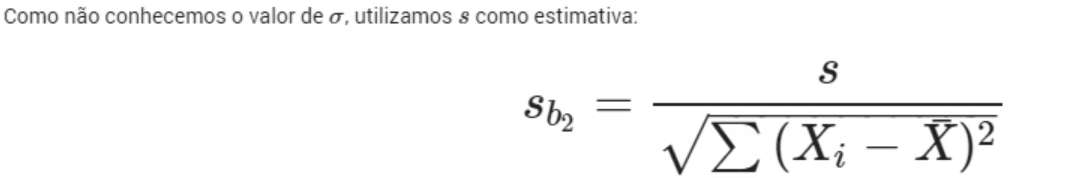

In [ ]:
s = np.sqrt(resultado_regressao.mse_resid)
s

138.18572317010901

In [ ]:
soma_desvio2 = dataset.X.apply(lambda x: (x - dataset.X.mean())**2).sum()
soma_desvio2

387063229.26174504

In [ ]:
s_beta_2 = s / np.sqrt(soma_desvio2)
s_beta_2

0.007023801312806332

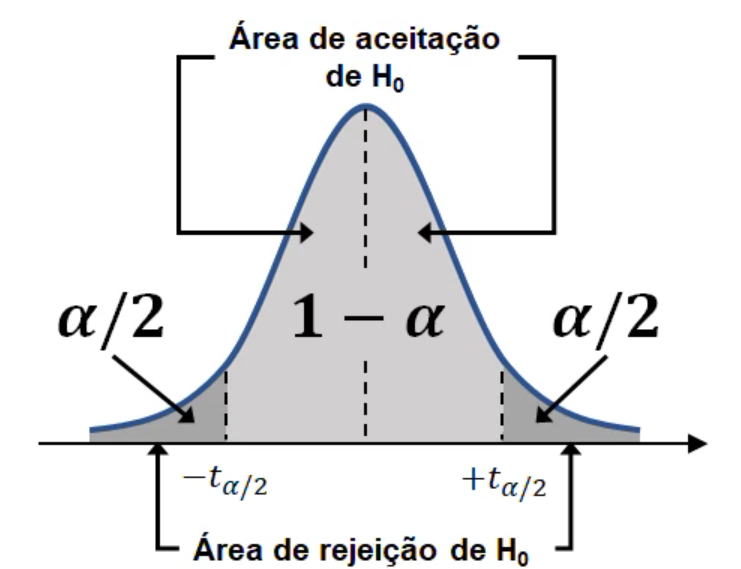

In [ ]:
from scipy.stats import t as t_student

In [ ]:
confianca = 0.95
significancia = 1 - confianca

In [ ]:
grau_de_liberdade = resultado_regressao.df_resid
grau_de_liberdade

48.0

In [ ]:
probabilidade = (0.5 + (confianca / 2))
probabilidade

0.975

In [ ]:
t_alpha_2 = t_student.ppf(probabilidade, grau_de_liberdade)
t_alpha_2

2.0106347546964454

In [ ]:
t = (beta_2 - 0) / s_beta_2
t

46.286814614060766

### Calculando usando Statsmodels

In [ ]:
resultado_regressao.tvalues

const     0.837018
X        46.286815
dtype: float64

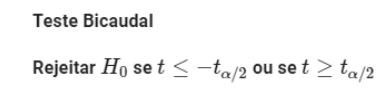

In [ ]:
t <= - t_alpha_2

False

In [ ]:
t >= - t_alpha_2

True

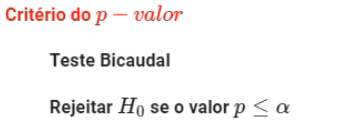

In [ ]:
p_valor = 2 * (t_student.sf(t, grau_de_liberdade))
p_valor

1.7400935040373596e-41

In [ ]:
p_valor = resultado_regressao.pvalues[1]
p_valor

1.740093504037409e-41

In [ ]:
p_valor <= significancia

True

Conclusão: Rejeitamos H0, pois existe uma relação significativa entre as duas variáveis

Tudo isso pode ser analisado no .summary()

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2142.
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.74e-41
Time:                        17:41:25   Log-Likelihood:                -316.36
No. Observations:                  50   AIC:                             636.7
Df Residuals:                      48   BIC:                             640.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.2292     46.868      0.837      0.4

# Teste F ou Teste de significância conjunta dos parâmetros


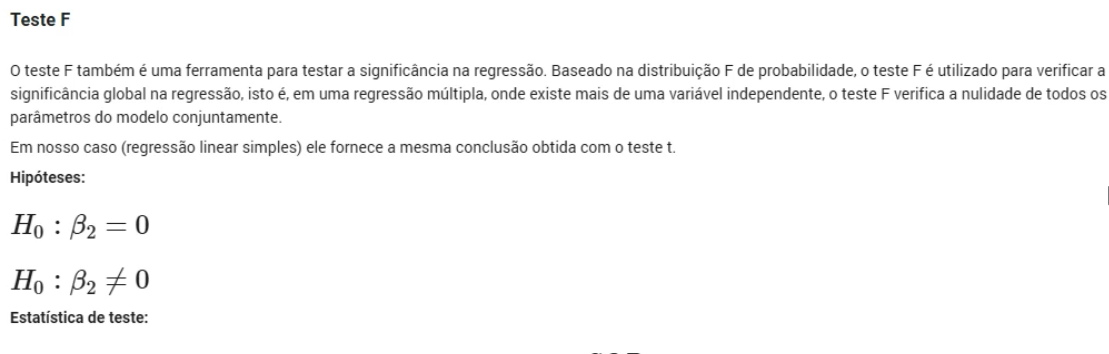

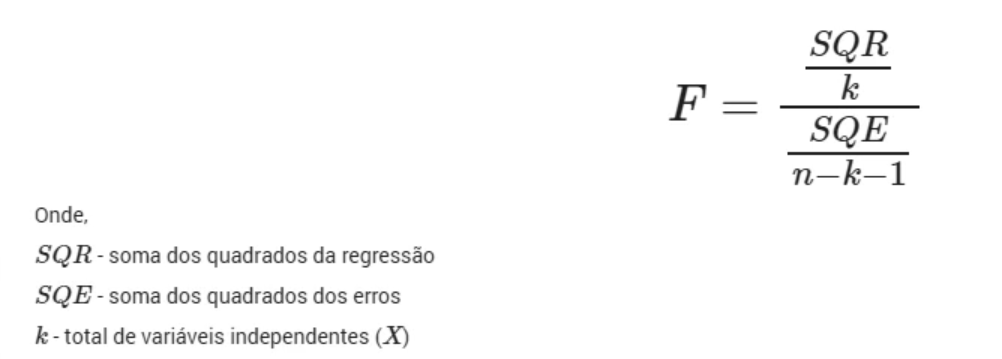

Realizando os cálculos

In [ ]:
resultado_regressao.mse_model

40911079.584470905

In [ ]:
resultado_regressao.mse_resid

19095.294088046005

In [ ]:
F = resultado_regressao.mse_model / resultado_regressao.mse_resid
F

2142.4692071164263

### Usando Statsmodels

In [ ]:
resultado_regressao.fvalue

2142.4692071164263

obtendo o p-valor

In [ ]:
resultado_regressao.f_pvalue

1.7400935040374276e-41

In [ ]:
from scipy.stats import f

In [ ]:
p_valor = f.sf(F, 1, n - 2)
p_valor

1.7400935040374276e-41

# Demais Testes

Todos os demais teste aparecem no .summary() da regressão

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2142.
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.74e-41
Time:                        18:35:04   Log-Likelihood:                -316.36
No. Observations:                  50   AIC:                             636.7
Df Residuals:                      48   BIC:                             640.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.2292     46.868      0.837      0.4

## Omnibus

In [ ]:
from scipy.stats import normaltest

normaltest teste se a distribuição segue como uma normal

In [ ]:
normaltest(dataset.Residuos)

NormaltestResult(statistic=1.4513489198794818, pvalue=0.4839980215697136)

In [ ]:
statistic, p_valor = normaltest(dataset.Residuos)

In [ ]:
p_valor <= 0.05

False

In [ ]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

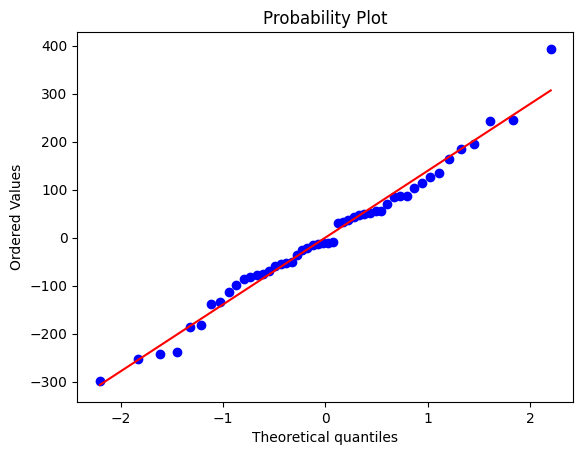

In [ ]:
(_, (_,_,_)) = probplot(dataset.Residuos, plot = plt)  ## colocamos (_, (_,_,_)) pois não probplot retorna valores e um gráfico, no caso queremos apenas o gráfico

Vemos que a distribuição não segue uma normal
Vamos então pegar a Altura do df dados, pois ela sim é uma normal, e comparar o gráfico de prob

<Axes: >

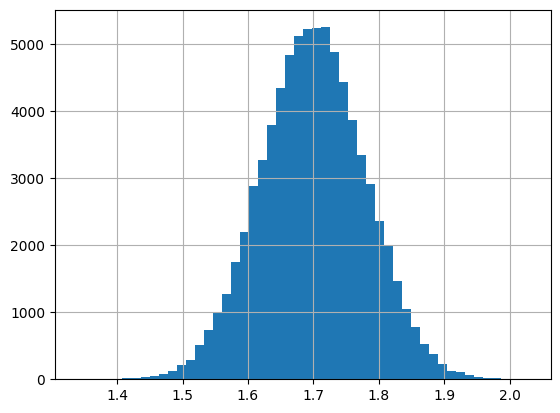

In [ ]:
dados.Altura.hist(bins = 50)

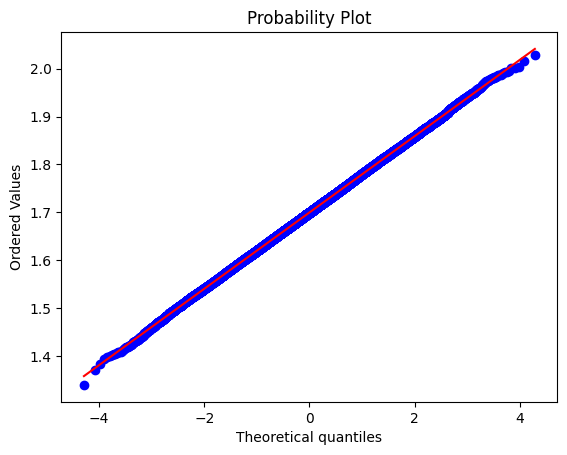

In [ ]:
(_, (_,_,_)) = probplot(dados.Altura, plot = plt)

Verificando a simetria

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2142.
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.74e-41
Time:                        18:46:01   Log-Likelihood:                -316.36
No. Observations:                  50   AIC:                             636.7
Df Residuals:                      48   BIC:                             640.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.2292     46.868      0.837      0.4

In [ ]:
from scipy.stats import skew

In [ ]:
S = skew(dataset.Residuos)
S

0.19710992061256977

Verificando a curtose

In [ ]:
from scipy.stats import kurtosis

In [ ]:
C = 3 + kurtosis(dataset.Residuos) ## tem que somar 3
C

3.421537988173418

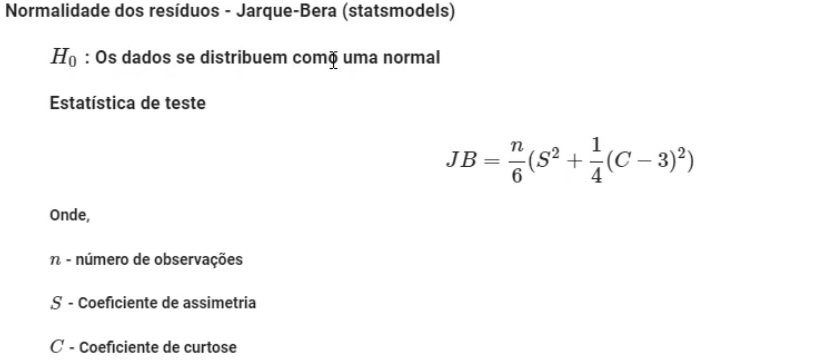

In [ ]:
JB = (n / 6) * (S ** 2 + (1 / 4) * (C - 3) ** 2)
JB

0.6939657472684729

In [ ]:
from scipy.stats import chi2

In [ ]:
p_valor = chi2.sf(JB, 2)
p_valor

0.7068174333679829

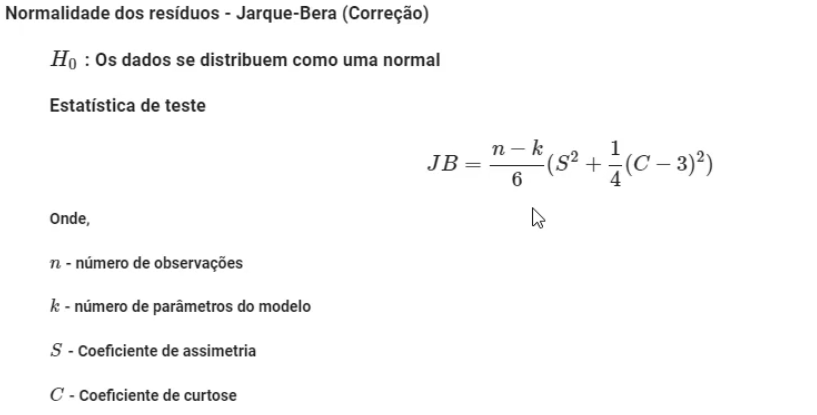

In [ ]:
JB = (n - 1 / 6) * (S ** 2 + (1 / 4) * (C - 3) ** 2)
JB

4.149915168665468

In [ ]:
p_valor = chi2.sf(JB, 2)
p_valor

0.12556175316579402

1) A hipótese nula (H0) do teste de Omnibus afirma que os resíduos se distribuem como uma normal.

2) A estatística de teste de Jarque-Bera é uma função dos coeficientes de assimetria e curtose dos resíduos.

3) A ferramenta gráfica probplot() nos ajuda a verificar a normalidade dos resíduos.